## 데이터 불러오기

In [1]:
import os
import numpy as np
import tensorflow as tf
import cv2

import matplotlib.pyplot as plt
from IPython import display

In [2]:
import zipfile
file_name = "archive.zip"
output_dir = "/aiffel/aiffel/MAIN_QUEST_2"
zip_file = zipfile.ZipFile(file_name)
zip_file.extractall(path=output_dir)

In [3]:
image_path = os.getenv('HOME') + "/aiffel/MAIN_QUEST_2/Motorcycle Night Ride Dataset/images"
file_list = os.listdir(image_path)
class_count = 6
len(os.listdir(image_path)) 

600

In [4]:
file_list

['Screenshot (433).png',
 'Screenshot (447).png___fuse.png',
 'Screenshot (389).png',
 'Screenshot (444).png',
 'night ride (90).png___save.png',
 'night ride (71).png___save.png',
 'night ride (78).png___fuse.png',
 'Screenshot (429).png.png',
 'Screenshot (356).png___save.png',
 'Screenshot (314).png___fuse.png',
 'Screenshot (309).png___save.png',
 'night ride (67).png',
 'Screenshot (416).png___save.png',
 'night ride (61).png',
 'Screenshot (438).png___save.png',
 'night ride (84).png___fuse.png',
 'Screenshot (396).png___save.png',
 'Screenshot (398).png___save.png',
 'Screenshot (448).png___fuse.png',
 'night ride (36).png___fuse.png',
 'Screenshot (450).png',
 'Screenshot (404).png___save.png',
 'Screenshot (373).png',
 'Screenshot (395).png___save.png',
 'Screenshot (369).png___fuse.png',
 'Screenshot (388).png___fuse.png',
 'Screenshot (317).png___fuse.png',
 'Screenshot (324).png',
 'night ride (83).png___fuse.png',
 'Screenshot (394).png___fuse.png',
 'Screenshot (447).png_

In [5]:
from tensorflow.keras.utils import load_img, img_to_array, to_categorical

In [6]:
input_img_paths = sorted(
    [os.path.join(image_path, fname)
     for fname in os.listdir(image_path)
     if fname.endswith(".png")and not fname.endswith("___save.png") and not fname.endswith("___fuse.png")])
target_paths = sorted(
    [os.path.join(image_path, fname)
     for fname in os.listdir(image_path)
     if fname.endswith("___fuse.png") and not fname.startswith(".")])

In [7]:
print(input_img_paths[:5])
print(len(input_img_paths))

['/aiffel/aiffel/MAIN_QUEST_2/Motorcycle Night Ride Dataset/images/Screenshot (309).png', '/aiffel/aiffel/MAIN_QUEST_2/Motorcycle Night Ride Dataset/images/Screenshot (310).png', '/aiffel/aiffel/MAIN_QUEST_2/Motorcycle Night Ride Dataset/images/Screenshot (311).png', '/aiffel/aiffel/MAIN_QUEST_2/Motorcycle Night Ride Dataset/images/Screenshot (312).png', '/aiffel/aiffel/MAIN_QUEST_2/Motorcycle Night Ride Dataset/images/Screenshot (313).png']
200


In [8]:
print(target_paths[:5])
print(len(target_paths))

['/aiffel/aiffel/MAIN_QUEST_2/Motorcycle Night Ride Dataset/images/Screenshot (309).png___fuse.png', '/aiffel/aiffel/MAIN_QUEST_2/Motorcycle Night Ride Dataset/images/Screenshot (310).png___fuse.png', '/aiffel/aiffel/MAIN_QUEST_2/Motorcycle Night Ride Dataset/images/Screenshot (311).png___fuse.png', '/aiffel/aiffel/MAIN_QUEST_2/Motorcycle Night Ride Dataset/images/Screenshot (312).png___fuse.png', '/aiffel/aiffel/MAIN_QUEST_2/Motorcycle Night Ride Dataset/images/Screenshot (313).png___fuse.png']
200


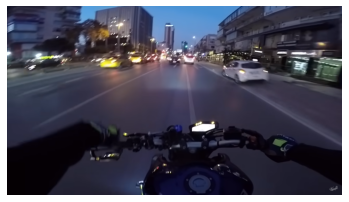

In [9]:
plt.axis("off")
plt.imshow(load_img(input_img_paths[9]))

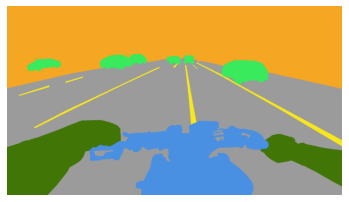

In [10]:
plt.axis("off")
plt.imshow(load_img(target_paths[9]))

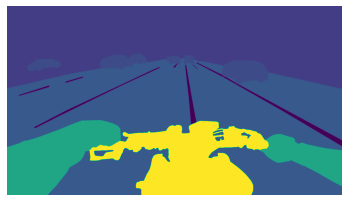

In [11]:
def display_target(target_array):
    normalized_array = (target_array.astype("uint8") - 1) * 127
    plt.axis("off")
    plt.imshow(normalized_array[:, :, 0])

sample_img = img_to_array(load_img(target_paths[9], color_mode="grayscale"))
display_target(sample_img)

In [12]:
import numpy as np
import random

img_size = (572, 572)
num_imgs = len(input_img_paths)

random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target_paths)

def path_to_input_image(path):
    return img_to_array(load_img(path, target_size=img_size))

def path_to_target(path):
    img = img_to_array(
        load_img(path, target_size=img_size, color_mode="grayscale"))
    img = img.astype("uint8") - 1
    return img

input_imgs = np.zeros((num_imgs,) + img_size + (3,), dtype="float32")
targets = np.zeros((num_imgs,) + img_size + (1,), dtype="uint8")
for i in range(num_imgs):
    input_imgs[i] = path_to_input_image(input_img_paths[i])
    targets[i] = path_to_target(target_paths[i])

num_val_samples = 50
train_input_imgs = input_imgs[:-num_val_samples]
train_targets = targets[:-num_val_samples]
val_input_imgs = input_imgs[-num_val_samples:]
val_targets = targets[-num_val_samples:]

In [45]:
train_targets.shape

(150, 572, 572, 1)

In [13]:
train_input_imgs

array([[[[  8.,   7.,  20.],
         [  8.,   7.,  20.],
         [  8.,   7.,  20.],
         ...,
         [  7.,   6.,  17.],
         [  7.,   6.,  17.],
         [  7.,   6.,  17.]],

        [[  8.,   7.,  20.],
         [  8.,   7.,  20.],
         [  8.,   7.,  20.],
         ...,
         [  7.,   6.,  17.],
         [  7.,   6.,  17.],
         [  7.,   6.,  17.]],

        [[  8.,   7.,  20.],
         [  8.,   7.,  20.],
         [  8.,   7.,  20.],
         ...,
         [  7.,   6.,  17.],
         [  7.,   6.,  17.],
         [  7.,   6.,  17.]],

        ...,

        [[ 21.,  18.,  26.],
         [ 21.,  18.,  26.],
         [ 21.,  18.,  26.],
         ...,
         [ 11.,   7.,  21.],
         [  8.,   7.,  18.],
         [  8.,   7.,  20.]],

        [[ 21.,  18.,  23.],
         [ 21.,  18.,  23.],
         [ 21.,  18.,  23.],
         ...,
         [ 11.,   7.,  21.],
         [  9.,   8.,  19.],
         [  9.,   8.,  19.]],

        [[ 11.,   9.,  14.],
       

In [14]:
val_input_imgs

array([[[[78., 28., 19.],
         [81., 31., 22.],
         [83., 34., 25.],
         ...,
         [28., 24., 25.],
         [28., 24., 25.],
         [28., 24., 25.]],

        [[93., 44., 35.],
         [97., 47., 38.],
         [98., 48., 39.],
         ...,
         [36., 31., 32.],
         [36., 31., 32.],
         [36., 31., 32.]],

        [[93., 44., 35.],
         [95., 46., 36.],
         [97., 48., 39.],
         ...,
         [35., 30., 31.],
         [35., 30., 31.],
         [35., 30., 31.]],

        ...,

        [[52., 48., 42.],
         [52., 48., 42.],
         [52., 48., 42.],
         ...,
         [17.,  9., 18.],
         [17.,  9., 18.],
         [17.,  9., 18.]],

        [[51., 47., 41.],
         [51., 47., 41.],
         [51., 47., 41.],
         ...,
         [17., 10., 18.],
         [17., 10., 18.],
         [17., 10., 18.]],

        [[37., 33., 27.],
         [37., 33., 27.],
         [37., 33., 27.],
         ...,
         [16.,  8., 17.],
        

## U-Net

In [15]:
!pip install graphviz
!pip install pydot

In [16]:
import tensorflow.keras.layers as layers
import tensorflow as tf

In [42]:
def get_model(img_size, num_classes):
    inputs = layers.Input(shape=img_size +(3,)) # 이미지 채널 수 :컬러
    x = layers.Rescaling(1./255)(inputs)

    # Contracting path 시작
    # [1]
    conv0 = layers.Conv2D(64, activation='relu', kernel_size = 3)(x)
    conv1 = layers.Conv2D(64, activation='relu', kernel_size=3)(conv0)  # Skip connection으로 Expanding path로 이어질 예정
    conv2 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(conv1)


    # Q.위 이미지를 보고 [2]번 블럭을 구현해 봅시다. (filter 수를 주의하세요!)
    conv3 = layers.Conv2D(128, activation='relu', kernel_size=3)(conv2)
    conv4 = layers.Conv2D(128, activation='relu', kernel_size=3)(conv3)
    conv5 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(conv4)


    # Q.위 이미지를 보고 [3]번 블럭을 구현해 봅시다. (filter 수를 주의하세요!)
    conv6 = layers.Conv2D(256, activation='relu', kernel_size=3)(conv5)
    conv7 = layers.Conv2D(256, activation='relu', kernel_size=3)(conv6)
    conv8 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(conv7)


    # Q.위 이미지를 보고 [4]번 블럭을 구현해 봅시다. (filter 수를 주의하세요!)
    conv9 = layers.Conv2D(512, activation='relu', kernel_size=3)(conv8)
    conv10 = layers.Conv2D(512, activation='relu', kernel_size=3)(conv9)
    conv11 = layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2))(conv10)


    # [5]
    conv12 = layers.Conv2D(1024, activation='relu', kernel_size=3)(conv11)
    conv13 = layers.Conv2D(1024, activation='relu', kernel_size=3)(conv12)
    # Contracting path 끝

    # Expanding path 시작
    # [6]
    trans01 = layers.Conv2DTranspose(512, kernel_size=2, strides=(2, 2), activation='relu')(conv13)
    crop01 = layers.Cropping2D(cropping=(4, 4))(conv10)
    concat01 = layers.concatenate([trans01, crop01], axis=-1)

    # [7]
    conv14 = layers.Conv2D(512, activation='relu', kernel_size=3)(concat01)
    conv15 = layers.Conv2D(512, activation='relu', kernel_size=3)(conv14)
    trans02 = layers.Conv2DTranspose(256, kernel_size=2, strides=(2, 2), activation='relu')(conv15)

    # [8]
    crop02 = layers.Cropping2D(cropping=(16, 16))(conv7)
    concat02 = layers.concatenate([trans02, crop02], axis=-1)


    # Q.위 이미지를 보고 [9]번 블럭을 구현해 봅시다. (filter 수를 주의하세요!)
    conv16 = layers.Conv2D(256, activation='relu', kernel_size=3)(concat02)
    conv17 = layers.Conv2D(256, activation='relu', kernel_size=3)(conv16)
    trans03 = layers.Conv2DTranspose(128, kernel_size=2, strides=(2, 2), activation='relu')(conv17)


    # Q.위 이미지를 보고 [10]번 블럭을 구현해 봅시다. (cropping=(40, 40))
    crop03 = layers.Cropping2D(cropping=(40, 40))(conv4)
    concat03 = layers.concatenate([trans03, crop03], axis=-1)


    # Q.위 이미지를 보고 [11]번 블럭을 구현해 봅시다. (filter 수를 주의하세요!)
    conv18 = layers.Conv2D(128, activation='relu', kernel_size=3)(concat03)
    conv19 = layers.Conv2D(128, activation='relu', kernel_size=3)(conv18)
    trans04 = layers.Conv2DTranspose(64, kernel_size=2, strides=(2, 2), activation='relu')(conv19)


    # Q.위 이미지를 보고 [12]번 블럭을 구현해 봅시다. (cropping=(88, 88))
    crop04 = layers.Cropping2D(cropping=(88, 88))(conv1)
    concat04 = layers.concatenate([trans04, crop04], axis=-1)


    # [13]
    conv20 = layers.Conv2D(64, activation='relu', kernel_size=3)(concat04)
    conv21 = layers.Conv2D(64, activation='relu', kernel_size=3)(conv20)
    # Expanding path 끝

    outputs = layers.Conv2D(num_classes, kernel_size=1, activation='softmax')(conv21)

    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="u-net")
    
    return model

model = get_model(img_size = img_size, num_classes = 6)

In [31]:
model.summary()

Model: "u-net"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 572, 572, 3) 0                                            
__________________________________________________________________________________________________
rescaling_2 (Rescaling)         (None, 572, 572, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_38 (Conv2D)              (None, 570, 570, 64) 1792        rescaling_2[0][0]                
__________________________________________________________________________________________________
conv2d_39 (Conv2D)              (None, 568, 568, 64) 36928       conv2d_38[0][0]                  
______________________________________________________________________________________________

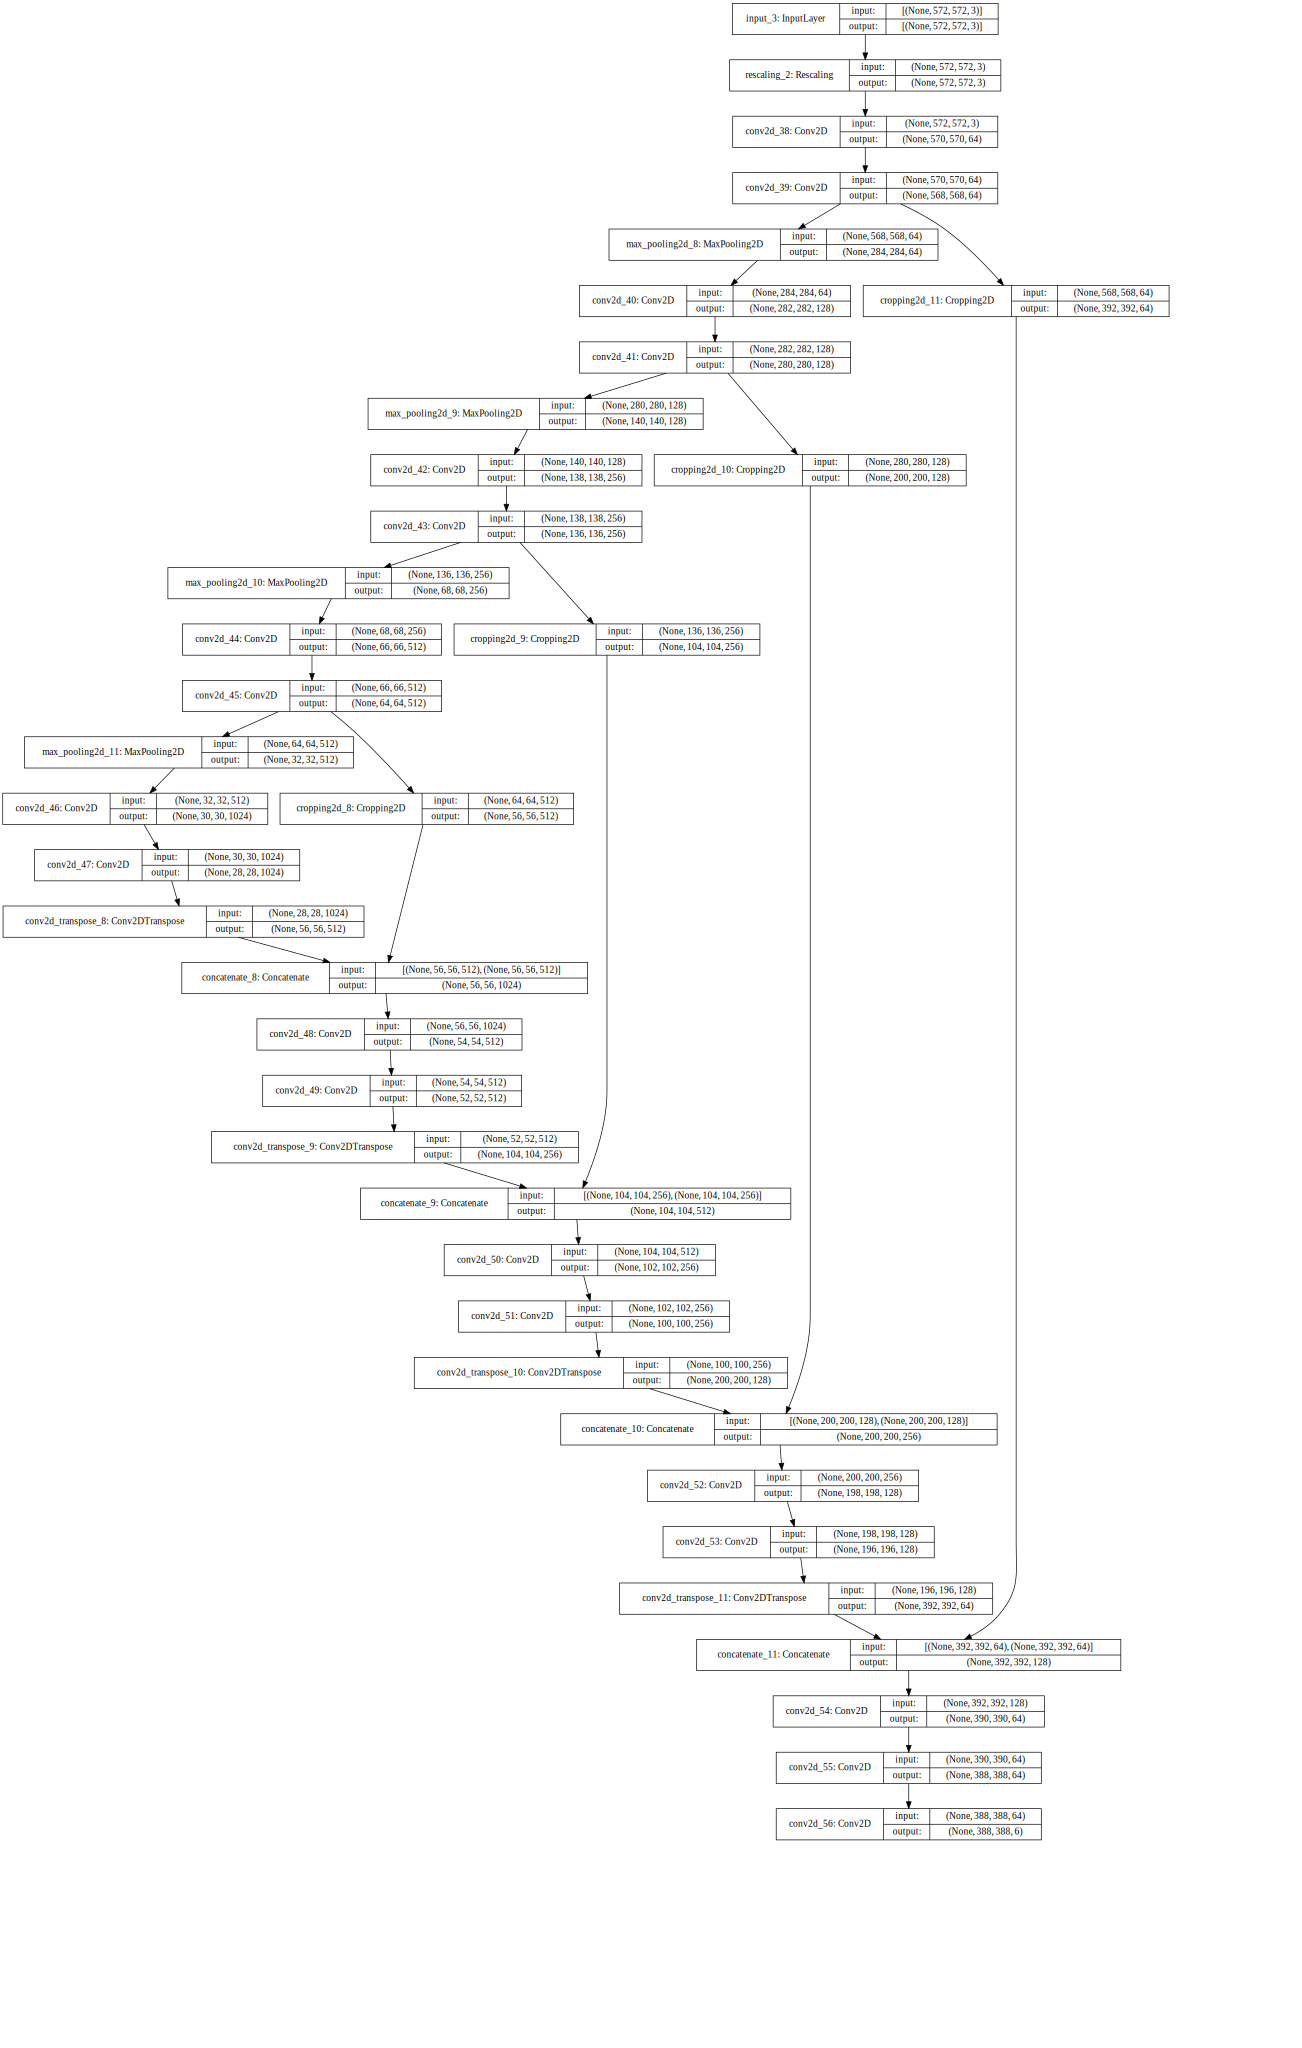

In [32]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot  

%matplotlib inline

SVG(model_to_dot(model, show_shapes= True, show_layer_names=True, dpi=80).create(prog='dot', format='svg'))  #dpi를 작게 하면 그래프가 커집니다.

In [43]:
import tensorflow as tf

model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("night_ride_segmentation.h5",
                                    save_best_only=True)
]


history = model.fit(train_input_imgs, train_targets,
                    epochs=5,
                    callbacks=callbacks,
                    batch_size=4,
                    validation_data=(val_input_imgs, val_targets))

Epoch 1/5


InvalidArgumentError:  logits and labels must have the same first dimension, got logits shape [602176,6] and labels shape [1308736]
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at tmp/ipykernel_180/3765158999.py:11) ]] [Op:__inference_train_function_17885]

Function call stack:
train_function


In [37]:
print(train_input_imgs.shape)

(150, 572, 572, 3)


In [35]:
print(train_targets.shape)

(150, 572, 572, 1)


In [25]:
unique_labels = np.unique(train_targets)
print("Unique labels:", unique_labels)

Unique labels: [ 88 131 154 164 174 212 255]


In [ ]:
epochs = range(1, len(history.history["loss"]) + 1)
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

## 회고

- 정말 정말 갈 길이 먼 것 같다.
- 레이블 할당이 잘못된 것 같은데, 뭐가 어떻게 된건지 잘 모르겠다.
- 시간이 날 때 왜 이렇게 된지 다시 확인해봐야겠다 ㅠㅠ